# PyTorch

PyTorch is a Python-based scientific computing package targeted at two sets of audiences:

* A replacement for NumPy to use the power of GPUs
* A deep learning research platform that provides maximum flexibility and speed

Much line Numpy, PyTorch provies an n-dimensional array object called a **Tensor** and a large variety of functions for manipulating these tensors. Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing and have built-in functionality that makes optimization (such as gradient descent) very easy to manage.

In [36]:
import torch

In [37]:
x = torch.tensor([5.5, 3])
#torch a multi-dimensional matrix containing elements of a single data type.
print(x)

tensor([5.5000, 3.0000])


In [38]:
x = torch.empty(5, 3)
#creates empty torch
print(x)

tensor([[ 0.0000e+00,  1.5846e+29, -4.0089e+25],
        [-3.6902e+19,  8.3645e-21,  1.4013e-45],
        [-1.2160e+23,  4.5915e-41, -1.2160e+23],
        [ 4.5915e-41, -4.0063e+25,  8.5920e+09],
        [-1.6480e-19,  4.5758e-41, -4.0093e+25]])


In [39]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1252, 0.2720, 0.9373],
        [0.1027, 0.9548, 0.2476],
        [0.5819, 0.4586, 0.9093],
        [0.4750, 0.2189, 0.6960],
        [0.2612, 0.7543, 0.9924]])


In [40]:
x.shape

torch.Size([5, 3])

In [41]:
x.size()

torch.Size([5, 3])

There are several ways to perform operations on tensors:

In [42]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.9389, 0.5047, 1.0243],
        [0.6411, 1.2122, 0.8252],
        [0.9944, 0.8765, 0.9586],
        [0.9934, 0.4333, 1.5537],
        [0.8263, 1.0852, 1.5174]])


In [43]:
x.add(y)

tensor([[0.9389, 0.5047, 1.0243],
        [0.6411, 1.2122, 0.8252],
        [0.9944, 0.8765, 0.9586],
        [0.9934, 0.4333, 1.5537],
        [0.8263, 1.0852, 1.5174]])

In [44]:
torch.add(x,y)

tensor([[0.9389, 0.5047, 1.0243],
        [0.6411, 1.2122, 0.8252],
        [0.9944, 0.8765, 0.9586],
        [0.9934, 0.4333, 1.5537],
        [0.8263, 1.0852, 1.5174]])

It is possible to provide an output tensor as argument

In [45]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.9389, 0.5047, 1.0243],
        [0.6411, 1.2122, 0.8252],
        [0.9944, 0.8765, 0.9586],
        [0.9934, 0.4333, 1.5537],
        [0.8263, 1.0852, 1.5174]])


Or add in-place

In [46]:
y.add_(x)
print(y)

tensor([[0.9389, 0.5047, 1.0243],
        [0.6411, 1.2122, 0.8252],
        [0.9944, 0.8765, 0.9586],
        [0.9934, 0.4333, 1.5537],
        [0.8263, 1.0852, 1.5174]])


Reshaping a tensor is done by `.view`

In [12]:
x = torch.randn(4, 4)
y = x.view(16)
#view Returns a new tensor with the same data as the self tensor but of a different shape
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## PyTorch: Autograd

Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks. The **autograd** package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

`torch.Tensor` is the central class of the package. If you set its attribute `.requires_grad` as True, it starts to track all operations on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute. To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.

In [13]:
from torch.optim import SGD
import torch.nn as nn

In [14]:
x = torch.tensor(-2., requires_grad=True)
y = torch.tensor( 5., requires_grad=True)
z = torch.tensor(-4., requires_grad=True)
q = x + y
f = q * z
print(x)
print(q)
print(f)

tensor(-2., requires_grad=True)
tensor(3., grad_fn=<AddBackward0>)
tensor(-12., grad_fn=<MulBackward0>)


In [15]:
q = x + y
f = q * z

In [16]:
print('q:', q)
print('q.grad:', q.grad) #.grad is the gradient attribute
print('f:', f)
print('f.grad:', f.grad)

q: tensor(3., grad_fn=<AddBackward0>)
q.grad: None
f: tensor(-12., grad_fn=<MulBackward0>)
f.grad: None


In [25]:
f.backward() #started backpropogation from f and treated f as loss (gradient of a function with respect to itself is 1)
print('x.grad', x.grad)
print('y.grad', y.grad)
print('z.grad', z.grad)

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

By default, user created Tensors have `requires_grad=False` so we can can't backprop through them.

In [ ]:
x = torch.randn(2, 2)
y = torch.randn(2, 2)
print(x.requires_grad, y.requires_grad)
z = x + y
print(z)

``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad`` flag in-place. The input flag defaults to ``True`` if not given. In the following example, z contains enough information to compute gradients, as we saw above. Notice that if any input to an operation has ``requires_grad=True``, so will the output.

In [26]:
x = x.requires_grad_()
y = y.requires_grad_()
z = x + y
print('z:', z)
print('grad:', z.grad_fn)
print(z.requires_grad)

RuntimeError: The size of tensor a (1000) must match the size of tensor b (10) at non-singleton dimension 1

Now z has the computation history that relates itself to x and y. We can take its values, and **detach** it from its history using `.detach()`.

In [27]:
new_z = z.detach()

In [28]:
print('grad:', new_z.grad_fn)
print('new_z:', new_z)

grad: None
new_z: tensor([[4.0892, 1.0431],
        [2.8883, 4.3756]])


## How fast is PyTorch?

In [29]:
%%time
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 30353083.882144533
1 25668763.896842353
2 23583361.138733905
3 21057799.342128053
4 17069447.82484387
5 12387321.019240767
6 8197281.786605861
7 5174804.793345066
8 3261709.5803906475
9 2131523.587261985
10 1472585.9472162933
11 1079593.2228999073
12 833596.6564089528
13 669827.3146216973
14 554126.9344169714
15 467817.91719706735
16 400673.1983593288
17 346805.4460810479
18 302449.15800454206
19 265369.6513633472
20 233935.64658472576
21 207077.76303752972
22 183956.31059123762
23 163936.69564571802
24 146517.44840085777
25 131294.57832386103
26 117945.84849572722
27 106198.20006528826
28 95830.42926634423
29 86655.81830429999
30 78510.94865287133
31 71259.442994102
32 64801.49153635087
33 59034.85331533535
34 53869.690661003384
35 49232.24465630598
36 45066.79081791034
37 41312.513652883245
38 37923.61128698618
39 34857.92423308223
40 32081.740583119867
41 29562.800316174427
42 27273.989794007484
43 25191.06488990512
44 23293.842003539638
45 21565.028254220655
46 19986.16146917338


487 0.0004398186946544849
488 0.00042494076070403417
489 0.00041056371357877454
490 0.00039667449643360187
491 0.0003832635481721061
492 0.0003703030642206656
493 0.00035778500295288566
494 0.00034569171704425304
495 0.0003340067108058794
496 0.00032272280181512217
497 0.0003118205204922757
498 0.0003012870908658721
499 0.00029111303443993936
CPU times: user 1.48 s, sys: 144 ms, total: 1.62 s
Wall time: 860 ms


In [23]:
%%time
import torch

device = torch.device('cpu')
# device = torch.device('cuda') # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 10000, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-8
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss; loss is a scalar, and is stored in a PyTorch Tensor
    # of shape (); we can get its value as a Python number with loss.item().
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 3506759424.0
1 3442005760.0
2 3872572416.0
3 4842099712.0
4 6466561024.0
5 8939028480.0
6 12538347520.0
7 17632937984.0
8 24666298368.0
9 34092261376.0
10 46237696000.0
11 61018857472.0
12 77556744192.0
13 93758996480.0
14 106339188736.0
15 111537528832.0
16 106999906304.0
17 93297213440.0
18 74130939904.0
19 54218817536.0
20 37093236736.0
21 24143513600.0
22 15186069504.0
23 9338962944.0
24 5663052800.0
25 3404229120.0
26 2035833088.0
27 1213700224.0
28 722291840.0
29 429404640.0
30 255148048.0
31 151566720.0
32 90030200.0
33 53479856.0
34 31772468.0
35 18879692.0
36 11221504.0
37 6671803.5
38 3968286.25
39 2361371.25
40 1405951.0
41 837670.8125
42 499506.90625
43 298165.96875
44 178207.25
45 106678.7734375
46 63985.5078125
47 38471.21875
48 23200.50390625
49 14043.7509765625
50 8540.0751953125
51 5222.67041015625
52 3215.85693359375
53 1996.4759521484375
54 1251.5301513671875
55 793.4547119140625
56 509.51483154296875
57 331.8939208984375
58 219.54974365234375
59 147.59805297851562

348 0.00039149820804595947
349 0.00038504175608977675
350 0.00038161143311299384
351 0.000377550779376179
352 0.00037544724182225764
353 0.00037146260729059577
354 0.0003692488535307348
355 0.00036583031760528684
356 0.0003626970574259758
357 0.0003593633300624788
358 0.00035309421946294606
359 0.00035290338564664125
360 0.00035277236020192504
361 0.0003502930048853159
362 0.00034667967702262104
363 0.00034799915738403797
364 0.0003457299608271569
365 0.0003437247942201793
366 0.0003392737708054483
367 0.00033849518513306975
368 0.0003338655806146562
369 0.00033152959076687694
370 0.00032909552101045847
371 0.0003283742698840797
372 0.0003269539156462997
373 0.00032723587355576456
374 0.0003272026660852134
375 0.0003265567938797176
376 0.0003231565351597965
377 0.00032313517294824123
378 0.000321834726491943
379 0.0003195242607034743
380 0.0003156077000312507
381 0.00031574309105053544
382 0.00031426240457221866
383 0.00031276760273613036
384 0.0003094331477768719
385 0.000303924578474

In [24]:
%%time
import torch

# device = torch.device('cpu')
device = torch.device('cuda') # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 10000, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device)
w2 = torch.randn(H, D_out, device=device)

learning_rate = 1e-8
for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss; loss is a scalar, and is stored in a PyTorch Tensor
    # of shape (); we can get its value as a Python number with loss.item().
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

AssertionError: Torch not compiled with CUDA enabled

## Regression in PyTorch

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

In [31]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)



In [33]:
x_train.shape

(15, 1)

In [32]:
y_train.shape

(15, 1)

In [34]:
# Linear regression model
model = nn.Linear(input_size, output_size) #define linear classifier 

In [35]:
# Loss and optimizer
criterion = nn.MSELoss() #criterion is variable that holds the function that should calculate the loss for me 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
#model.parameters() now the model knows what to update

In [3]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train) #takes numpy array and outputs tensor 
    targets = torch.from_numpy(y_train) 

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)    #link to optimizer 
    #loss communicates with the parameter not the optimizer
    
    #batch gradient
    # Backward and optimize
    #Every time a variable is back propogated through, the gradient will be accumulated instead of being replaced so need to set to 0
    optimizer.zero_grad()     #clear gradients each iteration before calculating loss 
    loss.backward()    #every tensor has back propogation value associated with parameters. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True. 
    #After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively
    optimizer.step()     #performs a parameter update based on the current gradient
    #step() method, that updates the parameters.  
    #the update is not the based on the “closest” call but on the .grad attribute
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    #loss.item() gets the a scalar value held in the loss.

# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Epoch [10/100], Loss: 3.7377
Epoch [20/100], Loss: 0.7695
Epoch [30/100], Loss: 0.2823
Epoch [40/100], Loss: 0.2022
Epoch [50/100], Loss: 0.1890
Epoch [60/100], Loss: 0.1868
Epoch [70/100], Loss: 0.1864
Epoch [80/100], Loss: 0.1862
Epoch [90/100], Loss: 0.1861
Epoch [100/100], Loss: 0.1860


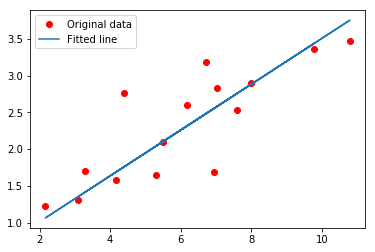

In [4]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend() #displays legend
plt.show()